TypeError: RectangleSelector.__init__() got an unexpected keyword argument 'drawtype'

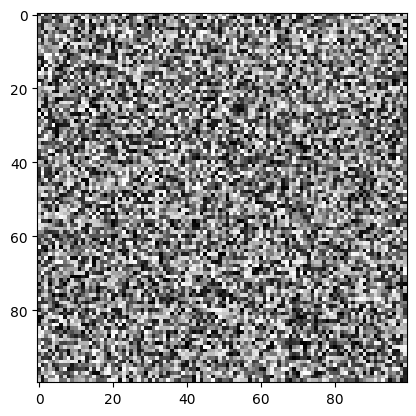

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
from dataclasses import dataclass


@dataclass(frozen=True)
class ImageData:
    image: np.ndarray
    mask: np.ndarray


def create_mask(shape: tuple) -> np.ndarray:
    """Create a mask with all ones (same size as image)."""
    return np.ones(shape)


def apply_mask(image: np.ndarray, mask: np.ndarray) -> np.ndarray:
    """Apply the mask to the image."""
    return image * mask


def update_mask(mask: np.ndarray, x1: int, y1: int, x2: int, y2: int) -> np.ndarray:
    """Update the mask based on the selected region."""
    new_mask = np.zeros_like(mask)
    new_mask[y1:y2, x1:x2] = 1
    return new_mask


def on_select(eclick, erelease, img_data: ImageData, ax):
    """Callback when the user makes a selection."""
    x1, y1 = int(eclick.xdata), int(eclick.ydata)
    x2, y2 = int(erelease.xdata), int(erelease.ydata)
    new_mask = update_mask(img_data.mask, x1, y1, x2, y2)
    masked_image = apply_mask(img_data.image, new_mask)
    ax.clear()
    ax.imshow(masked_image, cmap="gray")
    plt.draw()


def toggle_selector(event, selector):
    """Enable/disable the selector based on key press (toggle with 't').

    Parameters
    ----------
    event : KeyEvent
        The key event.
    selector : RectangleSelector
        The rectangle selector to toggle.
    """
    if event.key in ["t", "T"]:
        selector.set_active(not selector.active)


def interactive_image_masker(image: np.ndarray):
    """Main function to create an interactive image masker.

    Parameters
    ----------
    image : np.ndarray
        The image to mask.
    """
    mask = create_mask(image.shape)
    img_data = ImageData(image=image, mask=mask)
    fig, ax = plt.subplots()
    ax.imshow(image, cmap="gray")
    selector = RectangleSelector(
        ax,
        lambda eclick, erelease: on_select(eclick, erelease, img_data, ax),
        useblit=True,
        button=[1],
        minspanx=5,
        minspany=5,
        spancoords="pixels",
        interactive=True,
    )
    plt.connect("key_press_event", lambda event: toggle_selector(event, selector))
    plt.show()


img = np.random.rand(100, 100)
interactive_image_masker(img)